In [1]:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
# import seaborn as sns

# Global definition of matplotlib plots appearance

plt.rcParams['mathtext.default']= 'regular'
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams["axes.labelpad"]=10             # axes labels distance from tick labels
plt.rcParams["axes.titlesize"] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.dpi'] = 150             #  figure dimension in dpi

In [2]:
camb_installation_path = '../' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)

import camb
from camb import model, initialpower

In [3]:
stability_flag ={
                'EFT_ghost_math_stability'   : False,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : False,
                'EFT_gradient_stability'     : False,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : False,
                }

In [4]:
SCG0_params={'EFTflag' :4,
             'FullMappingEFTmodel': 6,
             'EFTCAMB_turn_on_time': 1e-8,
            }
SCG0_params.update(stability_flag)

In [5]:
SCG1_params ={'EFTflag' :4,
             'FullMappingEFTmodel': 0,
             'Horndeski_model': 6, 
             'Horndeski_parameter_number': 6, 
             'Horndeski_model_specific_ic': False,
             'Horndeski_evolve_hubble': False,
             'EFT_evolve_delta_phi': True,
             'EFT_evolve_metric_h': False,
             'Horndeski_param1': -0.3,
             'Horndeski_param2': 100,
             'Horndeski_param3': 0.7,
             'Horndeski_param4': 154,
             'Horndeski_param5': 40681355.771022968,
             'Horndeski_param6': 1.5720383365708201E-007,
             'Honrdeski_phi_ini': 0.,
             'Honrdeski_phidot_ini': 1.2223930429511141E-002,
             'Horndeski_background_interpolation_num_points': 10000,
             'Horndeski_background_a_ini': 6.6666222225185139E-006,
             'EFTCAMB_turn_on_time': 1e-8,
            }
SCG1_params.update(stability_flag)

In [6]:
SCG2_params ={'EFTflag' :4,
             'FullMappingEFTmodel': 0,
             'Horndeski_model': 6, 
             'Horndeski_parameter_number': 6, 
             'Horndeski_model_specific_ic': False,
             'Horndeski_evolve_hubble': False,
             'EFT_evolve_delta_phi': False,
             'EFT_evolve_metric_h': False,
             'Horndeski_param1': -0.3,
             'Horndeski_param2': 100,
             'Horndeski_param3': 0.7,
             'Horndeski_param4': 154,
             'Horndeski_param5': 40681355.771022968,
             'Horndeski_param6': 1.5720383365708201E-007,
             'Honrdeski_phi_ini': 0.,
             'Honrdeski_phidot_ini': 1.2223930429511141E-002,
             'Horndeski_background_interpolation_num_points': 10000,
             'Horndeski_background_a_ini': 6.6666222225185139E-006,
             'EFTCAMB_turn_on_time': 1e-8,
            }
SCG2_params.update(stability_flag)

In [7]:
model_key = ['SCG0','SCG1','SCG2'] 
model_par = [SCG0_params,SCG1_params,SCG2_params]
model = dict(zip(model_key,model_par))

In [8]:
toplot_totCL = []
labs = []
pts = []

for key in model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.read_ini('./scg_base_params.ini')

    pars = camb.set_params(cp=pars, **model[key])

    results = camb.get_results(pars)
    labs.append(key) # store the model names for the model passed to set_cosmology
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    toplot_totCL.append(totCL)

    tau = np.logspace(-2, 4, num=400)
    nms, vls = pars.EFTCAMB.get_evolution(results, 0.1, tau)
    dat = np.empty([len(tau), len(nms)])
    for i in range(len(tau)):
        dat[i,:] = np.array(list(vls[0][i]))
    pts.append((nms,dat))


***************************************************************
 EFTCAMB Scaling Cubic Galileon v2. background solver

 ---------------------------------------------------
Bisection algorithm ended successfully, with tollerance   -0.530E-06  and steps   17

y2 initial    =         0.465E-08

 ---------------------------------------------------
today values
x1 =     0.01
y1 =     0.04
y2 =     0.85
 ---------------------------------------------------
relative error on H_0        0.6998E-06
relative error on OmegaM_0  -0.1400E-05
OmegaRad_0 = 0.000085
OmegaDE_0  = 0.725221
OmegaM_0   = 0.274693
 ---------------------------------------------------
***************************************************************
 EFTCAMB Scaling Cubic Galileon v2. background solver

 ---------------------------------------------------
Bisection algorithm ended successfully, with tollerance   -0.530E-06  and steps   17

y2 initial    =         0.465E-08

 ---------------------------------------------------
t

/var/folders/xj/hxjqvvcs1fgc9v2ljfl3ry3h0000gn/T/ipykernel_25225/3544177230.py:16: RuntimeWarning: invalid value encountered in divide
  ax[1,0].plot(ls,(CLS[:,0] - cl0[:,0])/cl0[:,0], ls=l, color=c)
/var/folders/xj/hxjqvvcs1fgc9v2ljfl3ry3h0000gn/T/ipykernel_25225/3544177230.py:17: RuntimeWarning: invalid value encountered in divide
  ax[1,1].plot(ls,(CLS[:,1] - cl0[:,1])/cl0[:,1], ls=l, color=c)


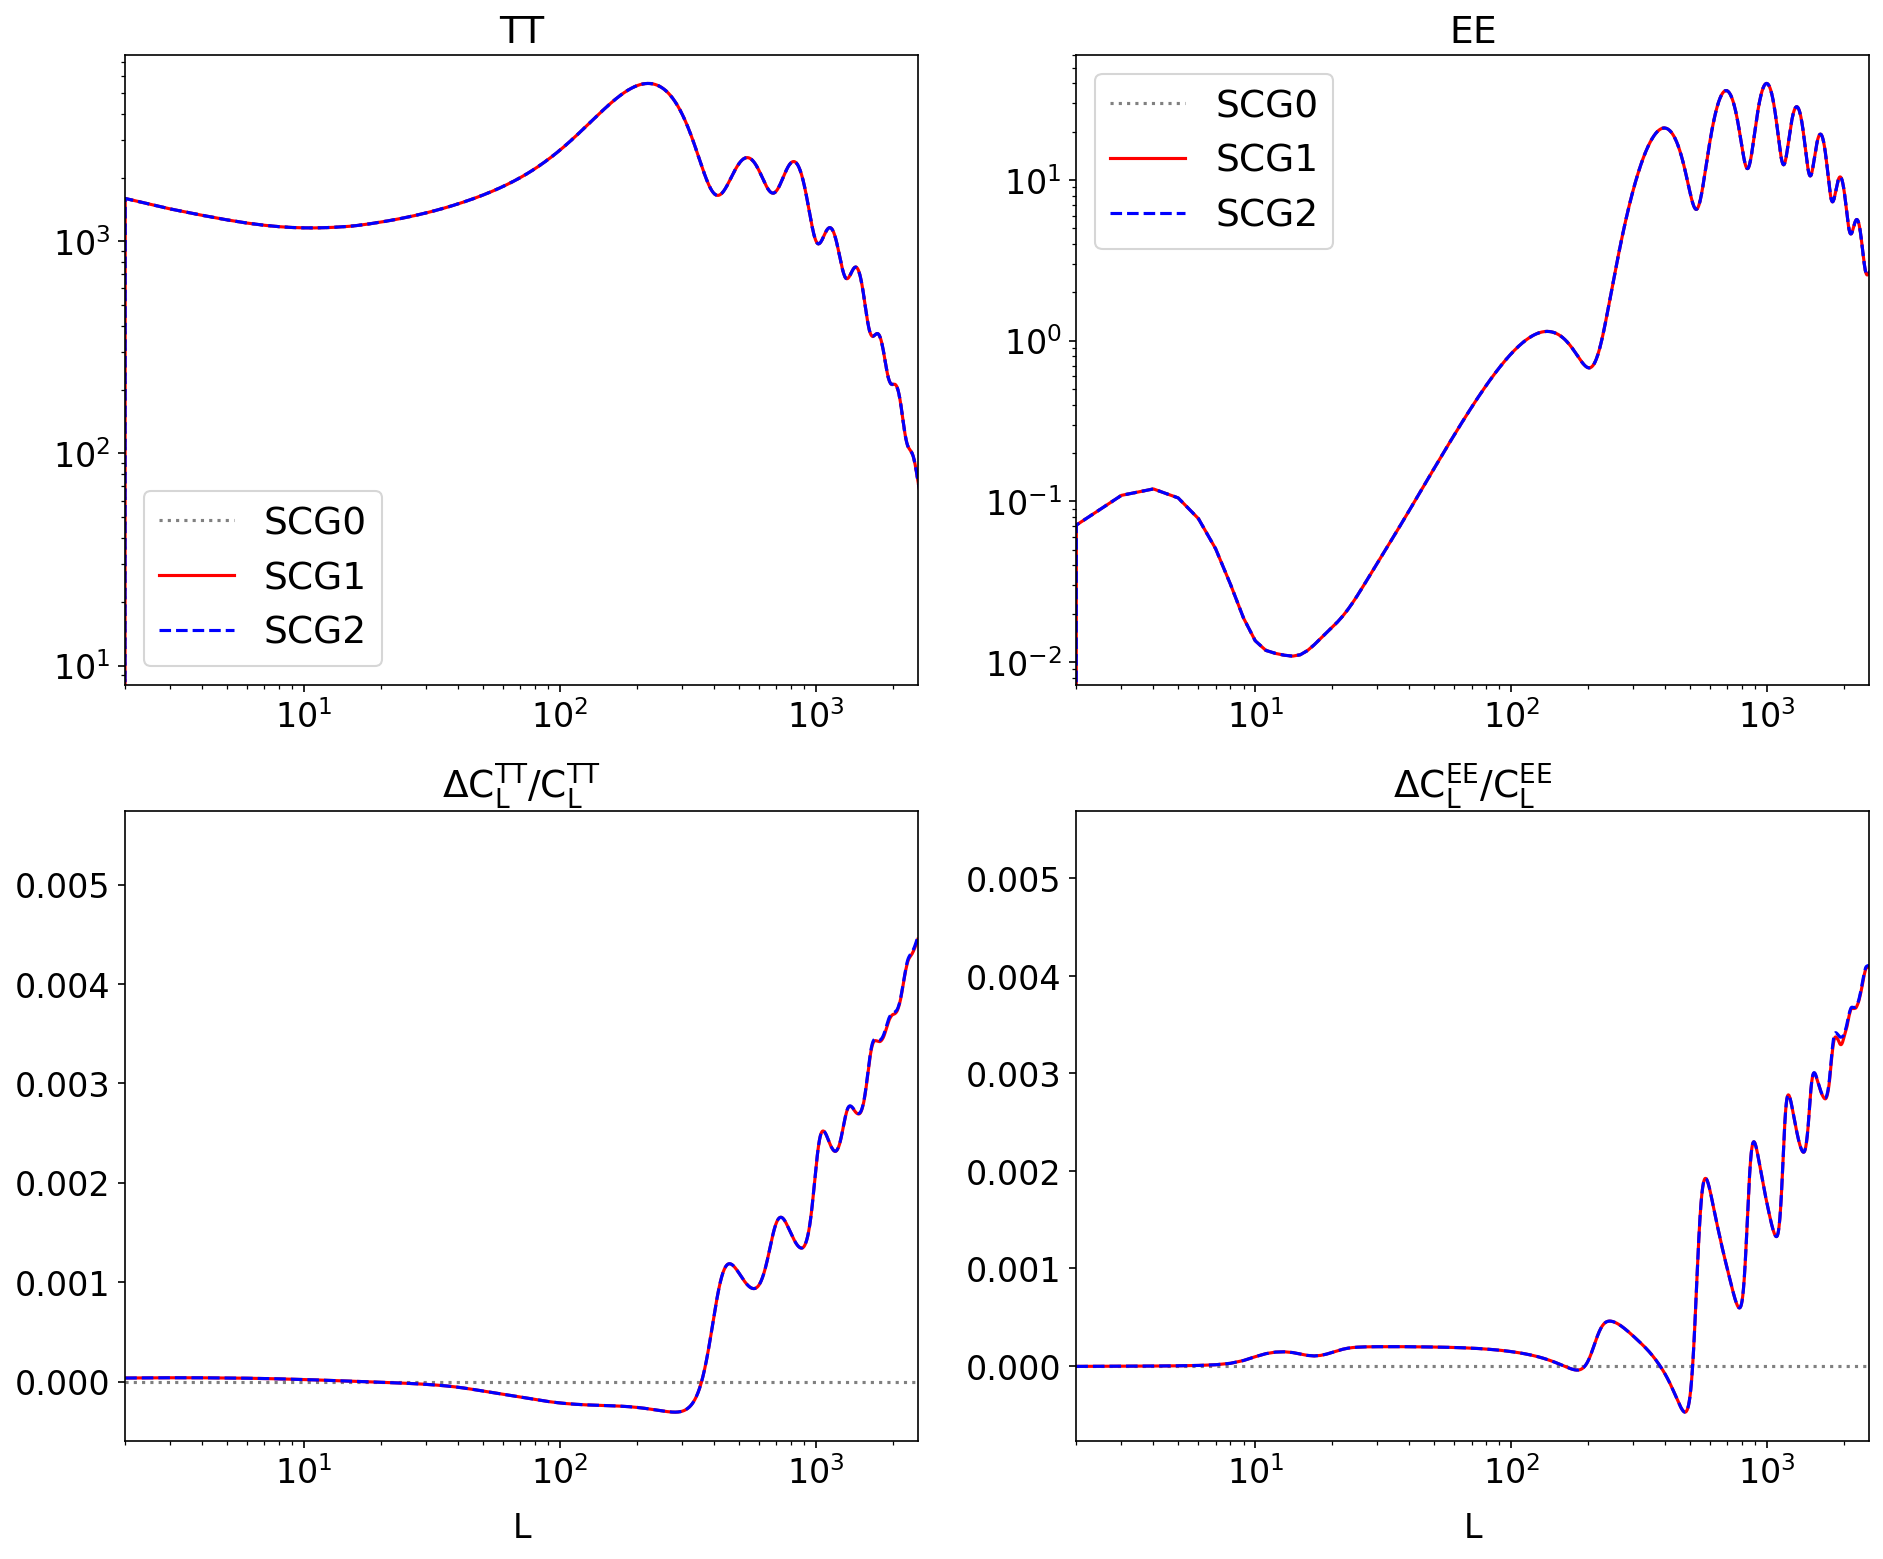

In [9]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = ['gray', 'red', 'blue']
linestyle = ['dotted', '-', '--',]
cl0 = toplot_totCL[0]
for CLS,c,lab,l in zip(toplot_totCL,color,labs,linestyle):

    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], label=lab, ls=l, color=c)
    ax[0,1].loglog(ls,CLS[:,1], label=lab, ls=l, color=c)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$EE$')
    if c != 'gray':
        ax[1,0].plot(ls,(CLS[:,0] - cl0[:,0])/cl0[:,0], ls=l, color=c)
        ax[1,1].plot(ls,(CLS[:,1] - cl0[:,1])/cl0[:,1], ls=l, color=c)
    else:
        ax[1,0].axhline(0, ls=l, color=c)
        ax[1,0].set_title(r'$\Delta C_L^{TT}/C_L^{TT}$')
        ax[1,1].axhline(0, ls=l, color=c)
        ax[1,1].set_title(r'$\Delta C_L^{EE}/C_L^{EE}$')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].set_xlabel('L')
ax[1,1].set_xlabel('L')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

for ax in ax.reshape(-1): ax.set_xlim([2,2500])
# fig.savefig('scg_cl.pdf')

Text(0.5, 0, 'Conformal Time [Mpc]')

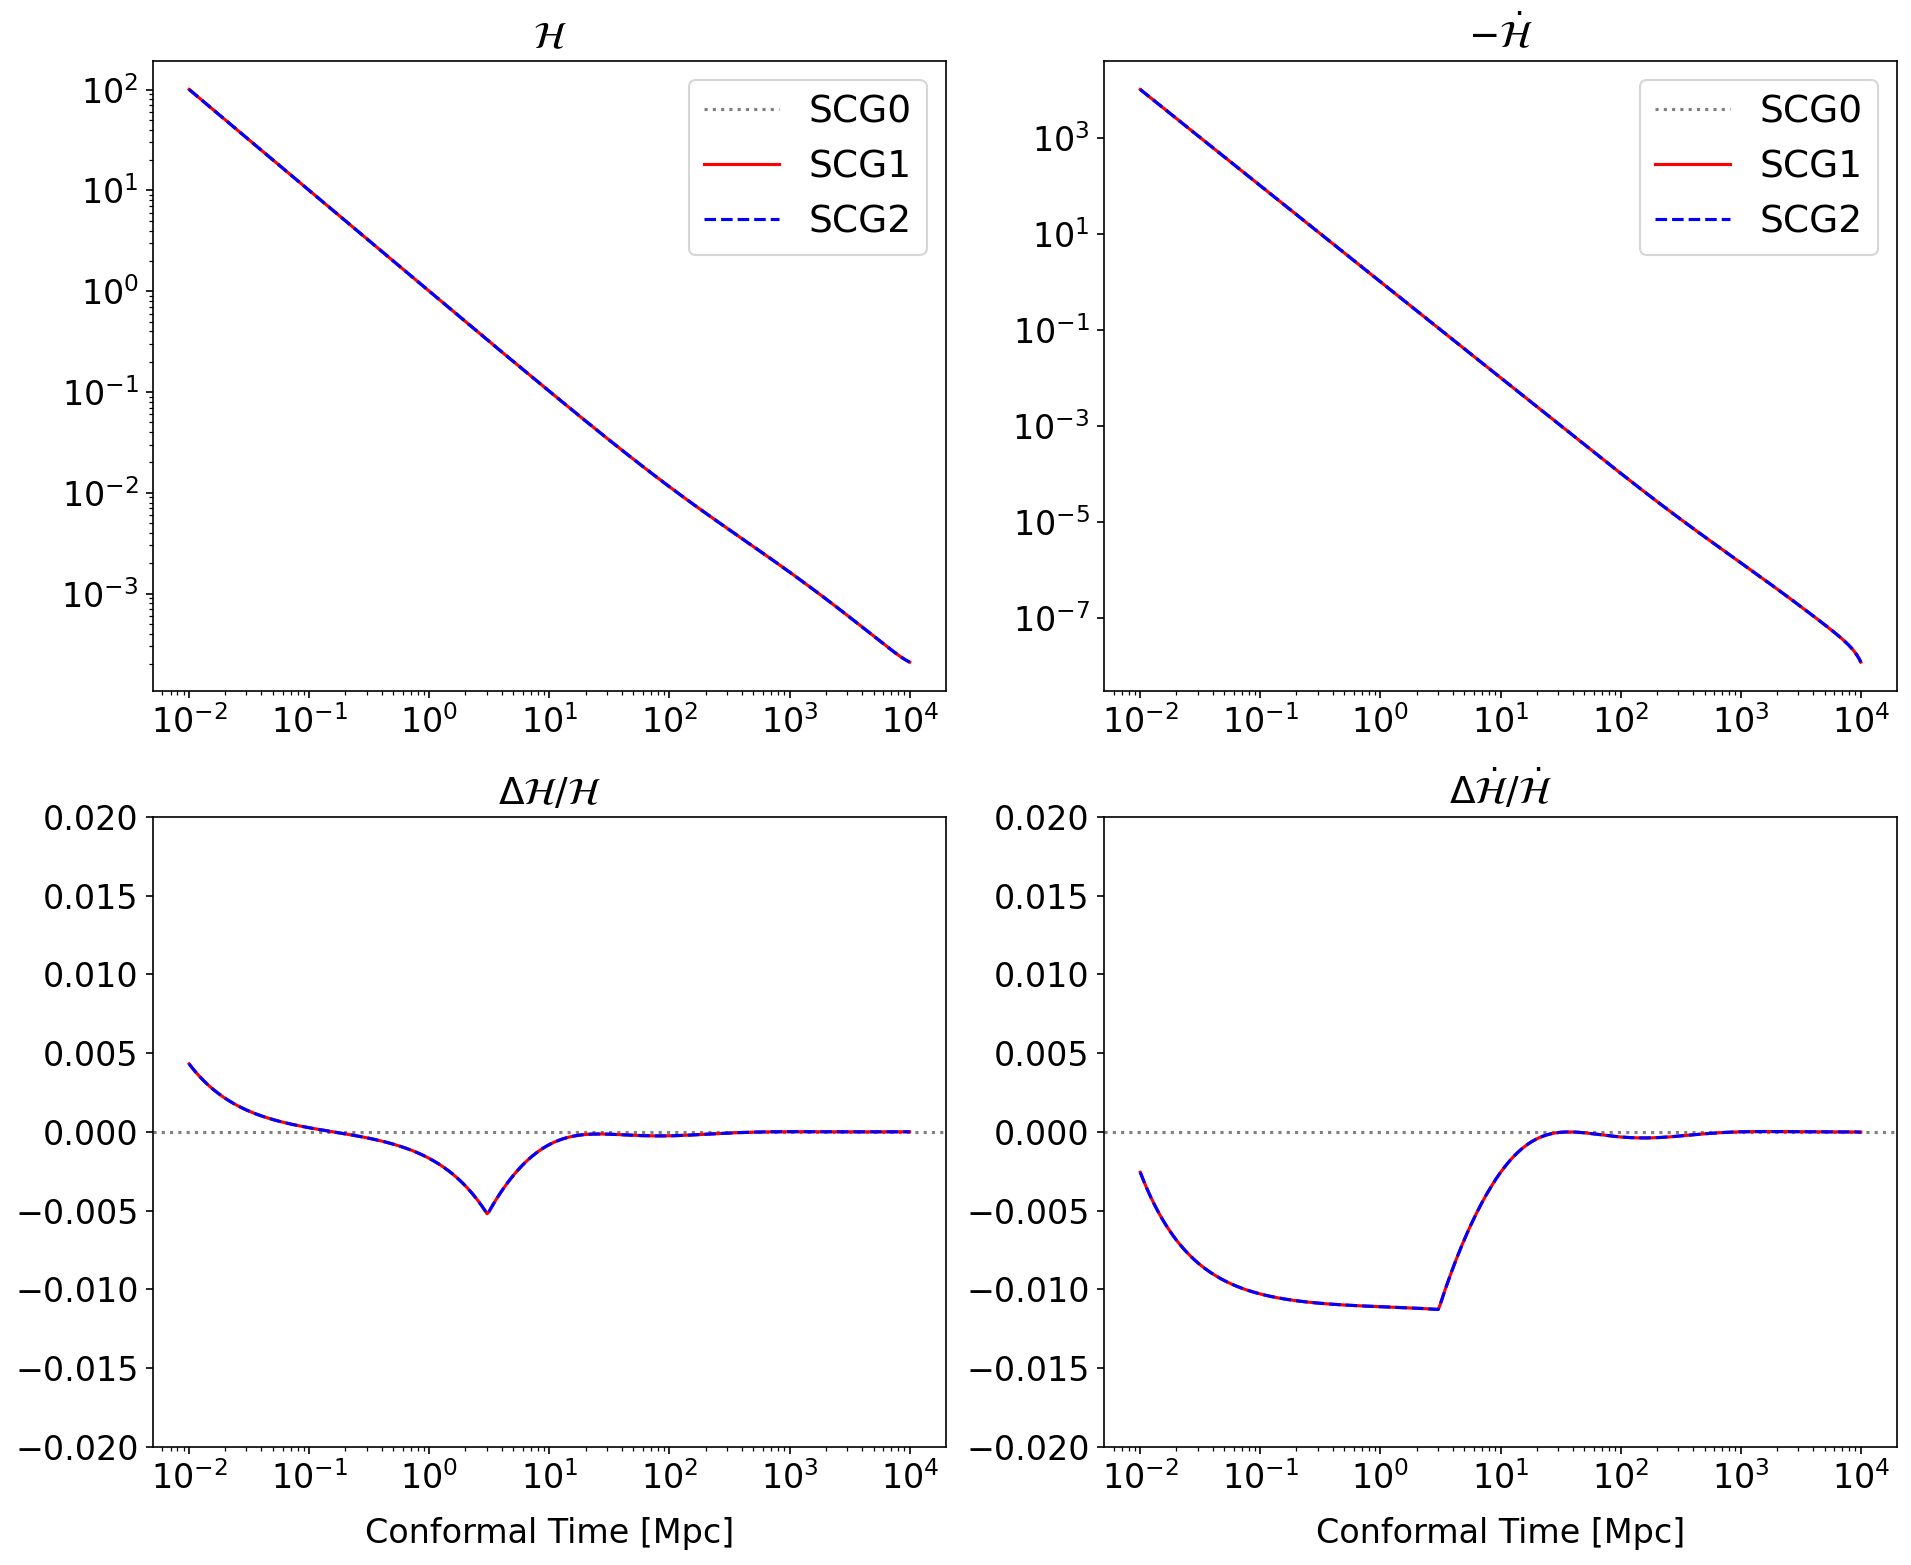

In [10]:
fig, ax = plt.subplots(2,2, figsize = (15,12))
color = ['gray', 'red', 'blue']
linestyle = ['dotted', '-', '--',]
dat1 = pts[0][1]
for pt,c,lab,l in zip(pts,color,labs,linestyle):

    nms = pt[0]
    dat = pt[1]
    tau = dat[:, nms.index('tau')]
    h = dat[:, nms.index('adotoa')]
    hdot = dat[:, nms.index('Hdot')]
    Phi = dat[:, nms.index('Phi')]
    Psi = dat[:, nms.index('Psi')]
    ax[0,0].loglog(tau, h, label=lab, ls=l, color=c)
    ax[0,1].loglog(tau, -hdot, label=lab, ls=l, color=c)
    if c != 'gray':
        ax[1,0].plot(tau, (h-dat1[:, nms.index('adotoa')])/dat1[:, nms.index('adotoa')], ls=l, color=c)
        ax[1,1].plot(tau, (hdot-dat1[:, nms.index('Hdot')])/dat1[:, nms.index('Hdot')], ls=l, color=c)
    else:
        ax[1,0].axhline(0, ls=l, color=c)
        ax[1,1].axhline(0, ls=l, color=c)
    ax[0,0].set_title(r'$\mathcal{H}$')
    ax[0,1].set_title(r"$-\dot{\mathcal{H}}$")
    ax[1,0].set_title(r'$\Delta \mathcal{H}/\mathcal{H}$')
    ax[1,1].set_title(r'$\Delta \dot{\mathcal{H}}/\dot{\mathcal{H}}$')

ax[1,0].set_xscale('log')
ax[1,0].set_ylim([-0.02,0.02])
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].set_xscale('log')
ax[1,1].set_ylim([-0.02,0.02])
ax[1,0].set_xlabel('Conformal Time [Mpc]')
ax[1,1].set_xlabel('Conformal Time [Mpc]')
# fig.savefig('scg_bk.pdf')